<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Jesus Alejandro Marquez Jimenez

**Fecha:** 01 de noviembre del 2023.

**Expediente** : 733761.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/morrismqz/Tarea8

# Tarea X: Clase X


# Proyección de Ahorros en un Banco

**Objetivo:** Proyectar un ahorro mensual para que, al término de su carrera en 13 meses, se tengan $85,000 MXN en la cuenta, considerando una tasa de interés del 2% anual ofrecida por Banregio.

## Teoría:

Para calcular el depósito mensual necesario, debemos considerar no solo el monto final deseado, sino también la tasa de interés que se acumulará en el tiempo. La fórmula de valor futuro (FV) se define como:

$ FV = PV(1 + r)^n $

Donde:
- $ FV $ es el valor futuro o monto final.
- $ PV $ es el valor presente o monto inicial.
- $ r $ es la tasa de interés por período.
- $ n $ es el número de períodos.

Sin embargo, en este problema, estamos haciendo depósitos constantes (anualidades) cada mes, lo cual es una situación de valor futuro de una anualidad. Por lo tanto, debemos usar la fórmula para el valor futuro de una anualidad ordinaria, que se puede expresar como:

$ FV = PMT \times \frac{(1 + r)^n - 1}{r} $

Donde:
- $ PMT $ es el pago o depósito mensual.

Dado que conocemos $ FV $, $ r $ y $ n $, podemos despejar $ PMT $ para determinar el depósito mensual necesario.

## Implementación:


         Fecha  Mes  Depósito Mensual  Interés  Principal  Balance Acumulado
0   30-11-2023    1           6473.33     0.00    6473.33            6473.33
1   30-12-2023    2           6473.33    10.79    6462.54           12946.66
2   29-01-2024    3           6473.33    21.58    6451.75           19419.99
3   28-02-2024    4           6473.33    32.37    6440.96           25893.32
4   29-03-2024    5           6473.33    43.16    6430.18           32366.65
5   28-04-2024    6           6473.33    53.94    6419.39           38839.99
6   28-05-2024    7           6473.33    64.73    6408.60           45313.32
7   27-06-2024    8           6473.33    75.52    6397.81           51786.65
8   27-07-2024    9           6473.33    86.31    6387.02           58259.98
9   26-08-2024   10           6473.33    97.10    6376.23           64733.31
10  25-09-2024   11           6473.33   107.89    6365.44           71206.64
11  25-10-2024   12           6473.33   118.68    6354.65           77679.97

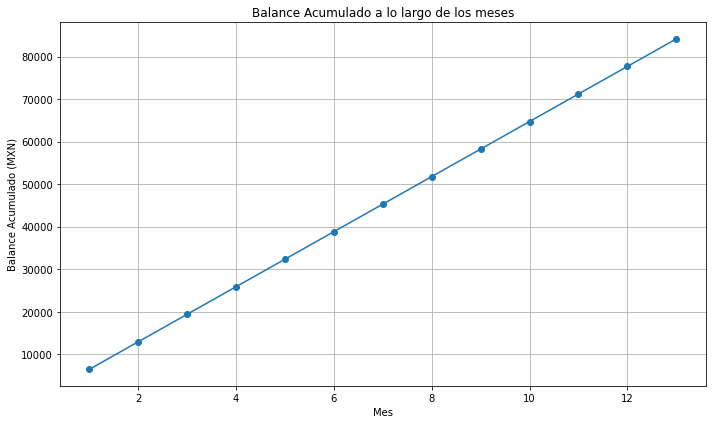

In [18]:
import numpy_financial as npf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


monto_final = 85000
tasa = 0.02 / 12  
meses = 13 


dep_mensual = npf.pmt(tasa, meses, 0, -monto_final)


tabla = []
acumulado = 0  

fecha_inicio = datetime.now().replace(day=1) - timedelta(days=1)

for mes in range(1, meses + 1):
    interes = acumulado * tasa
    principal = dep_mensual - interes
    acumulado += dep_mensual
    
   
    fecha_deposito = (fecha_inicio + timedelta(days=1)).replace(day=1) + timedelta(days=mes*30) - timedelta(days=1)
    
    tabla.append([fecha_deposito.strftime('%d-%m-%Y'), mes, dep_mensual, interes, principal, acumulado])


df = pd.DataFrame(tabla, columns=["Fecha", "Mes", "Depósito Mensual", "Interés", "Principal", "Balance Acumulado"])


df = df.round(2)


print(df)

plt.figure(figsize=(10, 6))
plt.plot(df["Mes"], df["Balance Acumulado"], marker='o')
plt.title("Balance Acumulado a lo largo de los meses")
plt.xlabel("Mes")
plt.ylabel("Balance Acumulado (MXN)")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
v